# Entrega 1 - Etapa Pre-Procesamiento de Datos

El objetivo de esta primera entrega es que los participantes adquieran habilidades en la etapa de Pre-Procesamiento de Datos de la Metodología CRISP DM.

## Profesores


*   Dr. Ierache, Jorge
*   Dr. Becerra Martín
*   Ing. Sanz Diego

## Alumnos

* Rodríguez, Emanuel Antonio
* Romano, Jorge Darío
* Sandoval Vasquez, Juan Leandro
* Sierra, Nicolas Federico

## Actividades

Realizar en un archivo de Google Colab **(UNO POR CADA DATASET SELECCIONADO)**, **un proceso de análisis exploratorio de datos, visualización de datos, manejo de datos faltantes y valores atípicos (outliers)**.

Indicar **(COMO SECCIONES DE TEXTO)** las **decisiones tomadas en la elección de cada técnica** para cada una de los procesos solicitados y las **conclusiones obtenidas por el grupo luego de analizar los resultados obtenidos**.

A continuación, brindamos detalles de las actividades a realizar por cada proceso.

## Procesos

### Importacion de librerias


In [ ]:
import kagglehub
from kagglehub.datasets import KaggleDatasetAdapter
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
from scipy.stats import zscore
import seaborn as sns
from sklearn.impute import SimpleImputer
import math as math

### 1 - Análisis exploratorio de datos

* Recopilar y examinar el conjunto de datos proporcionado.
* Identificar las características clave de los datos, como variables numéricas, categóricas, etc.
* Identificar posibles problemas en los datos, como valores atípicos o datos faltantes.
*	Realizar una limpieza inicial de los datos, si es necesario.
*	Trabajar sobre variables categóricas.

#### 1.1) Recopilar y examinar el conjunto de datos proporcionado.
* La recopilación de los datos se obtuvieron del Sitio: **Kaggle** -
Link de Datos: [Iris Flower Dataset](https://www.kaggle.com/datasets/arshid/iris-flower-dataset).
* A continuación se realiza una muestra parcial del contenido de datos:

In [ ]:
file_path = "IRIS.csv"

df = kagglehub.dataset_load(
  KaggleDatasetAdapter.PANDAS,
  "arshid/iris-flower-dataset",
  file_path,
)

df.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


#### 1.2) Identificar las características clave de los datos, como variables numéricas, categóricas, etc

In [ ]:
tipos = df.dtypes
numericas = tipos[tipos != object].index
no_numericas = tipos[tipos == object].index
print("Variables Numericas:" , numericas)
print("Variables Categoricas:" , no_numericas)

Variables Numericas: Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')
Variables Categoricas: Index(['species'], dtype='object')


#### 1.3) a - Identificar posibles problemas en los datos: datos faltantes

In [ ]:
faltantes = df.isnull()
print("DataFrame con valores faltantes (isnull()):\n", faltantes)

DataFrame con valores faltantes (isnull()):
      sepal_length  sepal_width  petal_length  petal_width  species
0           False        False         False        False    False
1           False        False         False        False    False
2           False        False         False        False    False
3           False        False         False        False    False
4           False        False         False        False    False
..            ...          ...           ...          ...      ...
145         False        False         False        False    False
146         False        False         False        False    False
147         False        False         False        False    False
148         False        False         False        False    False
149         False        False         False        False    False

[150 rows x 5 columns]


#### 1.3) b - Identificar posibles problemas en los datos: datos atipicos Utilizamos el algoritmo ZScore

In [ ]:
z_score = zscore(df['sepal_length'])
umbral = 2
atipicos = z_score[abs(z_score) > umbral]
print("\nDatos atípicos (puntuación Z):\n", atipicos)


Datos atípicos (puntuación Z):
 [2.12851559 2.24968346 2.24968346 2.24968346 2.4920192  2.24968346]


#### 1.4) Realizar una limpieza inicial de los datos, si es necesario.
&ensp; &ensp; &ensp; No seria necesario ya que no hay datos faltantes ni datos atipicos

In [ ]:
print(df.isnull().sum())

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


In [ ]:
print("Numero de filas duplicadas:", df.duplicated().sum())

Numero de filas duplicadas: 3


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


In [ ]:
for col in tipos[tipos == object].index:
    print(f"Valores en columna {col}: {df[col].unique()}")

Valores en columna species: ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


#### 1.5) Trabajar sobre variables categóricas.
&ensp; &ensp; &ensp; Convertimos variables texto en categoricas

In [ ]:
df = df.dropna(subset=['species'])
df["species"] = df["species"].map({"Iris-setosa": 0, "Iris-versicolor": 1, "Iris-virginica": 2})
display(df)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


### 2 - Visualización de Datos

* Seleccionar las variables relevantes para visualizar.
* Utilizar gráficos adecuados para representar diferentes tipos de variables, como histogramas, diagramas de dispersión, diagramas de caja, etc.
* Explorar la relación entre diferentes variables mediante gráficos de dispersión o gráficos de correlación.
* Realizar análisis visual para identificar patrones o tendencias en los datos.

#### 2.1) Selección de Diagramas para representar las variables relevantes
En nuestro caso seleccionamos las variables petal_length, petal_width y species, porque son mas apropiadas para determinar las clases

In [ ]:
df_seleccionado = df[['petal_length', 'petal_width', 'species']]
display(df_seleccionado)

,petal_length,petal_width,species
0,1.4,0.2,0
1,1.4,0.2,0
2,1.3,0.2,0
3,1.5,0.2,0
4,1.4,0.2,0
...,...,...,...
145,5.2,2.3,2
146,5.0,1.9,2
147,5.2,2.0,2
148,5.4,2.3,2


#### 2.2) Selección de Diagramas para representar las variables relevantes

##### Histograma

###### Funcion para convertir datos en grafico

In [ ]:
def plotPerColumnDistribution(df, n_cols=5, n_rows=None):
    n_columns = len(df.columns)
    if n_rows is None:
        n_rows = math.ceil(n_columns / n_cols)

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows))
    axes = axes.flatten()

    for i, col in enumerate(df.columns):
        sns.histplot(df[col], ax=axes[i], kde=True)
        axes[i].set_title(col)

    # Eliminar los subplots vacíos
    for i in range(n_columns, len(axes)):
        fig.delaxes(axes[i])

    plt.tight_layout()
    plt.show()

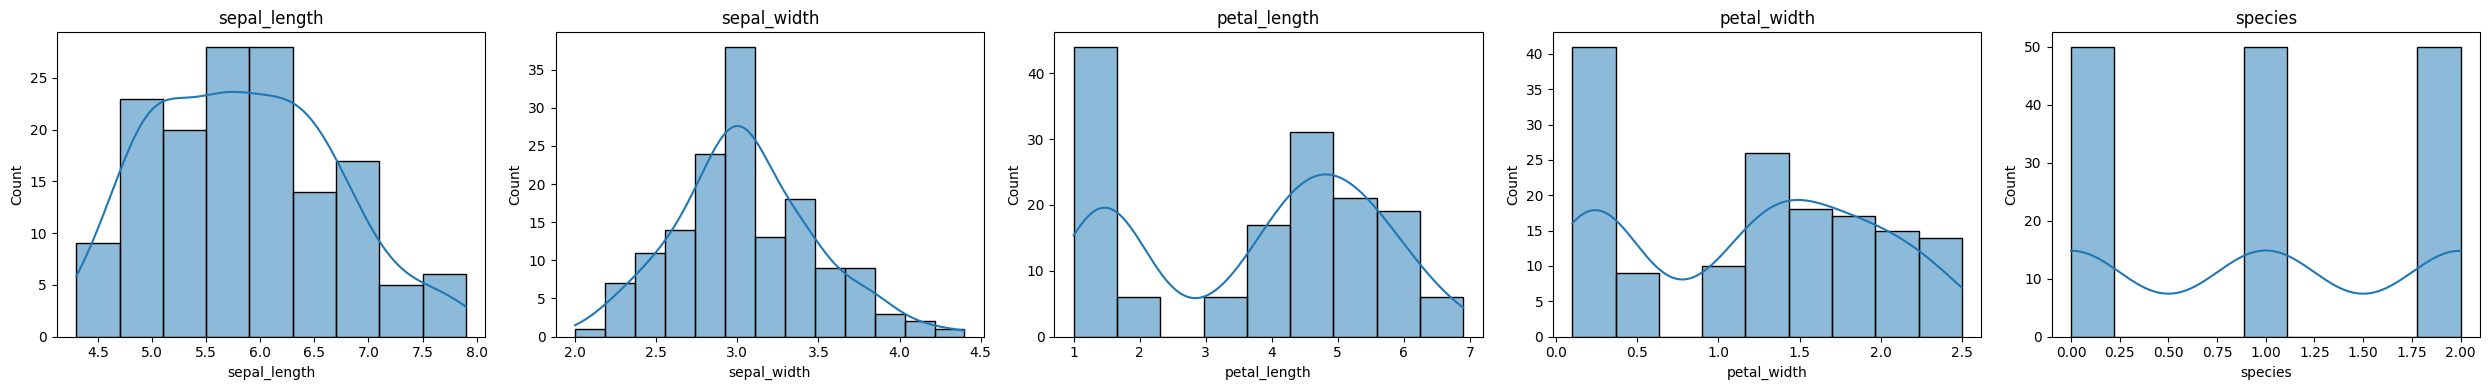

In [ ]:
plotPerColumnDistribution(df, n_cols=5)

###### Interpretación

* Grafico 1 - Distribución aproximadamente normal pero con ligera asimetría hacia la derecha mayoria de valores entre 5 y 7 cm
* Grafico 2 - Distribución más dispersa y algo sesgada a la izquierda (asimétrica)
* Grafico 3 - Tiene dos picos claros con largo de petalos de valores entre 1 y 2 cm o valores entre 4 y 5 cm
* Grafico 4 - Un grupo con valores cercanos a 0.2 cm y otro entre 1 y 2 cm. Esta variable podría ser muy útil para clasificar especies.
* Grafico 5 - Tres barras de igual altura, lo que indica que hay igual cantidad de muestras para cada especie: Iris-setosa - Iris-versicolor - Iris-virginica

###### 🔍Conclusión

* Las variables de pétalos (longitud y ancho) muestran claras diferencias entre especies, y son probablemente las más útiles para clasificarlas.
* Las variables de sépalos son menos discriminantes, aunque aún útiles.
* El conjunto de datos está balanceado con 150 observaciones en total (50 por especie).

##### Gráfico de Dispersión

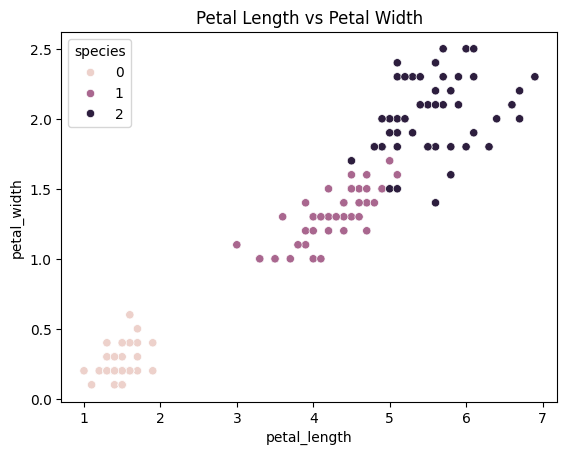

In [ ]:
sns.scatterplot(data=df, x="petal_length", y="petal_width", hue="species" )
plt.title("Petal Length vs Petal Width")
plt.show()

###### 📊 Ejes del gráfico



* Eje X (horizontal): Largo del pétalo (petal_length)
* Eje Y (vertical): Ancho del pétalo (petal_width)

###### 🌸 Especies representadas

1.   Iris-setosa (puntos azules):
  *	Se agrupan en la esquina inferior izquierda del gráfico.
  *	Esto indica que tienen pétalos más cortos y más estrechos.
  *	Muy poca superposición con las otras especies, lo que sugiere que es fácilmente distinguible por estas medidas.
2.   Iris-versicolor (puntos naranjas):
  *	Distribuidos en una zona intermedia del gráfico.
  *	Tienen pétalos de tamaño medio tanto en largo como en ancho.
  *	Hay cierta superposición con Iris-virginica, lo que puede dificultar su separación clara solo con estas dos variables.
3.   Iris-virginica (puntos verdes):
  *	Se encuentran más hacia la derecha y arriba.
  *	Presentan los pétalos más largos y anchos de las tres especies.
  *	También hay cierta dispersión, pero en general se distinguen por sus mayores dimensiones.

###### 🔍 Observaciones Clave

*	Existe una clara separación entre Iris-setosa y las otras dos especies.
*	Iris-versicolor y Iris-virginica tienen una zona de solapamiento, lo que podría requerir variables adicionales para una clasificación más precisa.
*	La relación entre largo y ancho del pétalo parece ser positiva: a mayor largo, mayor ancho.

##### Gráfico de Regresión

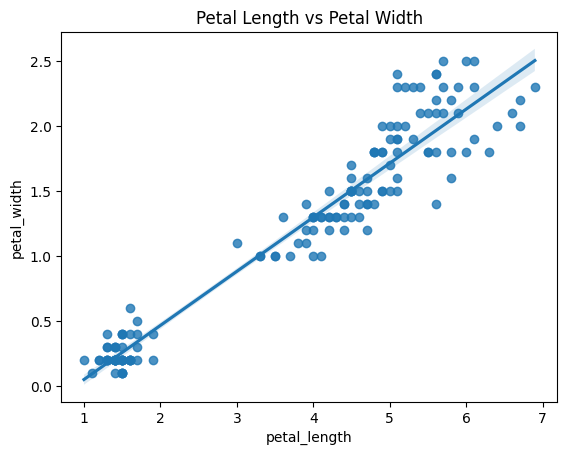

In [ ]:
sns.regplot(x="petal_length", y="petal_width", data=df)
plt.title("Petal Length vs Petal Width")
plt.show()

###### 📊 Características del gráfico

* Eje X: Largo del pétalo (rango: 1 a 7 cm)
* Eje Y: Ancho del pétalo (rango: 0.0 a 2.5 cm)
* Puntos azules: Representan observaciones individuales (flores).
* Línea azul: Línea de tendencia lineal (regresión).
* Banda sombreada: Intervalo de confianza alrededor de la línea de regresión.

###### 🔍 Análisis de la correlación

* Se observa una correlación positiva clara: a medida que aumenta el largo del pétalo, también lo hace el ancho.
*La línea de regresión indica que esta relación es aproximadamente lineal.
La banda de confianza sugiere que la predicción del ancho del pétalo a partir del largo es bastante precisa, especialmente en el rango medio de los datos.

###### 🧬 Sobre las especies

Aunque el gráfico no distingue visualmente entre especies (todos los puntos son azules), sabemos por el contexto que se trata de las tres especies de Iris:
* Iris-setosa probablemente se agrupa en la parte inferior izquierda (pétalos más pequeños).
* Iris-versicolor y Iris-virginica se extienden hacia la parte superior derecha (pétalos más grandes).


### 3 - Datos faltantes y/o Valores Atípicos (Outliers)

#### A continuación se evalua las columnas con datos faltantes y se determinó que los datasets no tiene valores nulos, por lo tanto no se realiza la eliminación de filas o columnas.

In [ ]:
missing_columns=df.isnull().sum()
print("df dataset")
print(missing_columns[missing_columns>0])
print()

df dataset
Series([], dtype: int64)



In [ ]:
df.isna().sum()

,0
sepal_length,0
sepal_width,0
petal_length,0
petal_width,0
species,0


#### Genero datos Nulos para hacer una prueba de imputación

In [ ]:
data_na = df.copy()

for col in data_na.columns:
    data_na.loc[data_na.sample(frac=0.1).index, col] = np.nan

data_na.isna().sum()

,0
sepal_length,15
sepal_width,15
petal_length,15
petal_width,15
species,15


#### A continuación realizamos una imputación Univariante en Sklearn

En el código usamos 'most_frequent' (la moda), que es una opción común para variables categóricas o numéricas con distribuciones sesgadas.

In [ ]:
mode_imputer = SimpleImputer(strategy = 'most_frequent')

for column in data_na.columns:
    values = data_na[column].values.reshape(-1,1)
    mode_imputer.fit(values)
    data_na[column] = mode_imputer.transform(values)

data_na.isna().sum()

,0
sepal_length,0
sepal_width,0
petal_length,0
petal_width,0
species,0
